https://www.tensorflow.org/tutorials/images/classification?hl=ja

# Image classificartion

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib
from glob import glob

In [3]:
# 1回のみ
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
# data_dir = pathlib.Path(data_dir).with_suffix('')

In [4]:
data_dir = r'C:\Users\JY810251\.keras\datasets\flower_photos'
image_count = len(list(glob(f'{data_dir}/*/*.jpg')))
print(image_count)

3670


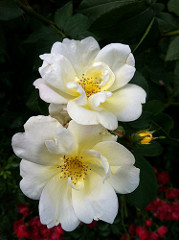

In [5]:
data_dir = r'C:\Users\JY810251\.keras\datasets\flower_photos'
roses = list(glob(f'{data_dir}/roses/*'))
PIL.Image.open(str(roses[0]))

In [6]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

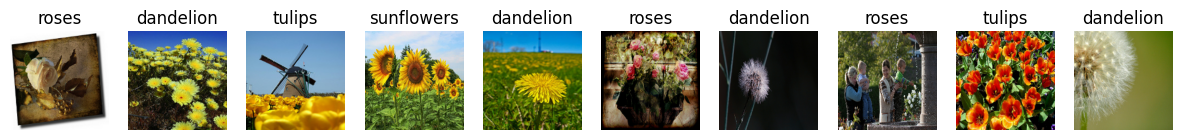

In [8]:
plt.figure(figsize=(15, 5))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(1, 10, i+1)
        plt.imshow(images[i].numpy().astype(int))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 180, 180, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
normalization_layer = layers.Rescaling(1./255)

In [12]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [13]:
tf.random.set_seed(32)

num_classes = len(class_names)

model = Sequential(
    [
        layers.Rescaling(1.0 / 255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes),
    ]
)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [15]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)
model.save(r'notebooks/tensorflow_test_06_0.keras')

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.4010 - loss: 1.3767 - val_accuracy: 0.5899 - val_loss: 1.0526
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.6410 - loss: 0.9466 - val_accuracy: 0.5954 - val_loss: 0.9839
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.7174 - loss: 0.7421 - val_accuracy: 0.6431 - val_loss: 0.9085
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.8326 - loss: 0.4795 - val_accuracy: 0.6253 - val_loss: 1.0750
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.9081 - loss: 0.2901 - val_accuracy: 0.6131 - val_loss: 1.1354
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.9585 - loss: 0.1390 - val_accuracy: 0.6240 - val_loss: 1.4836
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.9747 - loss: 0.0880 - val_accuracy: 0.6390 - val_loss: 1.6179
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.9773 - loss: 0.0717 - val_accu

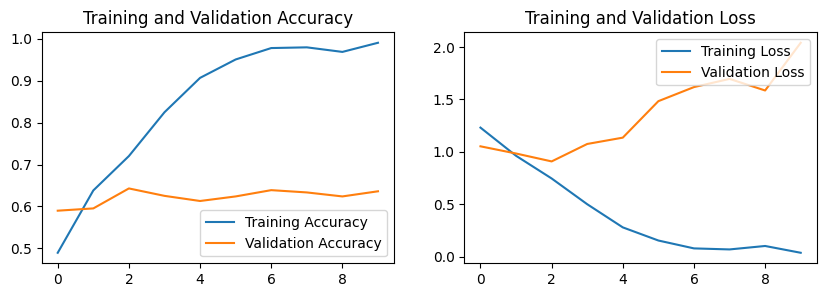

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [19]:
pd.DataFrame(history.history).tail(3)

,accuracy,loss,val_accuracy,val_loss
7,0.979905,0.068368,0.633515,1.696095
8,0.969005,0.101324,0.623978,1.585560
9,0.990804,0.036425,0.636240,2.040883


In [20]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


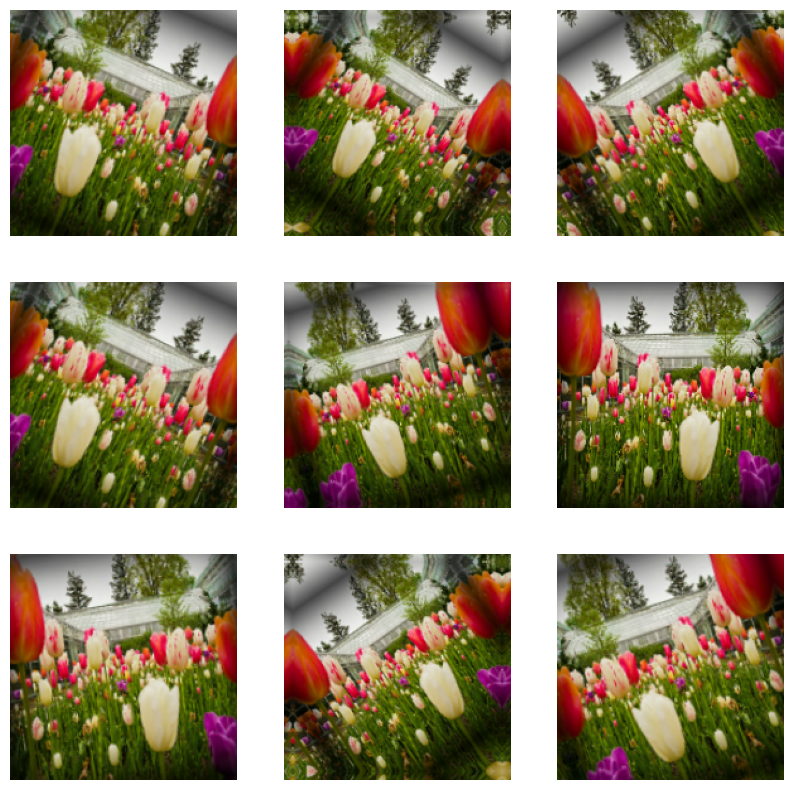

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [36]:
model = Sequential(
    [
        data_augmentation,
        layers.Rescaling(1.0 / 255),
        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, name="outputs"),
    ]
)

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

model.save(r'../notebooks/tensorflow_test_06_1.keras')

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 246ms/step - accuracy: 0.3345 - loss: 1.4956 - val_accuracy: 0.5736 - val_loss: 1.0805
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.5748 - loss: 1.0426 - val_accuracy: 0.5763 - val_loss: 1.1193
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.6199 - loss: 0.9470 - val_accuracy: 0.6213 - val_loss: 0.9996
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 235ms/step - accuracy: 0.6613 - loss: 0.8835 - val_accuracy: 0.6608 - val_loss: 0.8615
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 375ms/step - accuracy: 0.6840 - loss: 0.8107 - val_accuracy: 0.6512 - val_loss: 0.8378
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 436ms/step - accuracy: 0.7139 - loss: 0.7559 - val_accuracy: 0.6880 - val_loss: 0.7831
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 438ms/step - accuracy: 0.7337 - loss: 0.6895 - val_accuracy: 0.6962 - val_loss: 0.7814
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 37s 403ms/step - accuracy: 0.7379 - loss: 0.6722 - val_accu

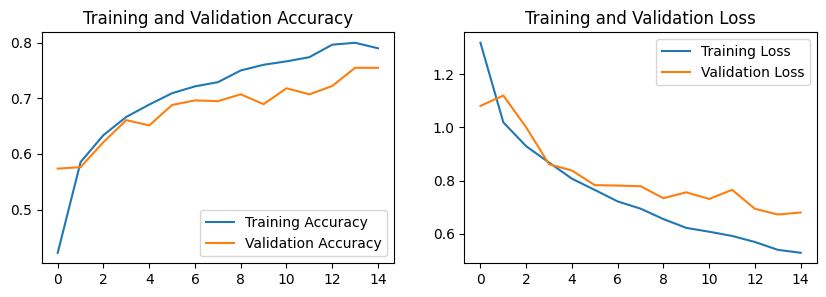

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file("Red_sunflower", origin=sunflower_url)

img = tf.keras.utils.load_img(sunflower_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence.".format(
        class_names[np.argmax(score)], 100 * np.max(score)
    )
)

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
This image most likely belongs to sunflowers with a 98.91 percent confidence.


In [41]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\JY810251\AppData\Local\Temp\tmp7cmxlbo1\assets


INFO:tensorflow:Assets written to: C:\Users\JY810251\AppData\Local\Temp\tmp7cmxlbo1\assets


Saved artifact at 'C:\Users\JY810251\AppData\Local\Temp\tmp7cmxlbo1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor_39')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2371564003856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564006736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564005968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564007312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564003664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564008080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564007120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564008848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564007888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2371564009616: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [46]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

interpreter.get_signature_list()

classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite